In [1]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot,glrt
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="value"
data=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")

In [2]:

loss="normalized_regret"
wins_zone_x_bench=pd.DataFrame()
wins_bench=pd.DataFrame()
budget_zones=[[1,4],[4,7],[7,10],[10,13]]
ds=data.loc[data[algorithm].isin(["PB","HB"])]
wins_zone_x_bench[benchmark]=list(ds[benchmark].unique())

full_wins=[]
full_scores=[]
full_benchmarks=[]
full_zones=[]
full_fidelities=[]
for f in range(1,13):
    print(f)

    wins_budget=[]
    for bench in ds[benchmark].unique():
        full_fidelities.append(f)
        mod=model(f"{loss}~{algorithm}",ds.loc[(ds[budget].between(f,f+0.5))&(ds[benchmark]==bench)],algorithm)
        post_hocs=mod.post_hoc(algorithm)
        if post_hocs[1].Sig[0] in ["***","**","*"]:
            wins_budget.append(-1 if post_hocs[1].Contrast[0].rsplit(" - ")[0 if post_hocs[1].Estimate[0]<0 else 1]=="PB" else 1)
            full_wins.append(-1 if post_hocs[1].Contrast[0].rsplit(" - ")[0 if post_hocs[1].Estimate[0]<0 else 1]=="PB" else 1)
            full_scores.append(post_hocs[1].Estimate[0])
        else:
            wins_budget.append(0) 
            full_wins.append(0)
            full_scores.append(0)
        full_benchmarks.append(bench)
        for zone in budget_zones:
            if f>=zone[0] and f+0.5<=zone[1]:
                full_zones.append(f"{zone[0]}_{zone[1]}")  
wins_bench[benchmark]=full_benchmarks
wins_bench["wins"]=full_wins
wins_bench["scores"]=full_scores
wins_bench["fidelity"]=full_fidelities
wins_bench["zone"]=full_zones

print(wins_zone_x_bench)
print(wins_bench)

1
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates


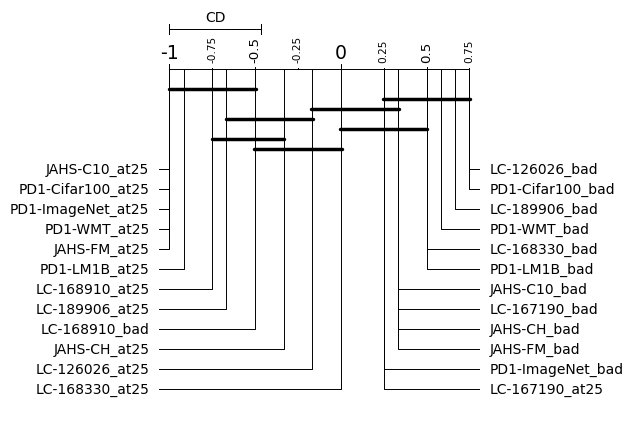

In [3]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)
wins_bench.to_csv("wins_bench.csv")
wins_model=model(f"wins~{benchmark}+fidelity",wins_bench,benchmark)
# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))

cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)


P-values adjusted by tukey method for family of 276 estimates


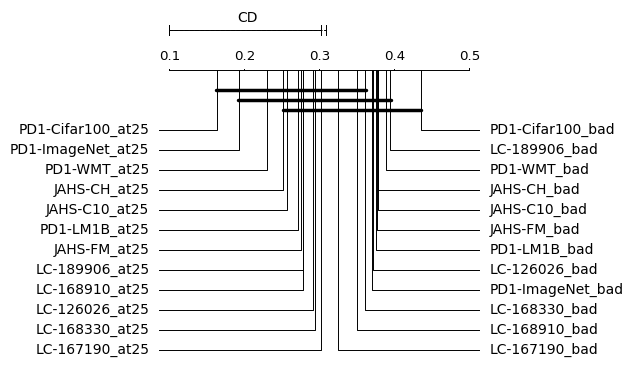

In [4]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)

wins_model=model(f"scores~{benchmark}+fidelity",wins_bench,benchmark)
# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))

cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)


boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 276 estimates


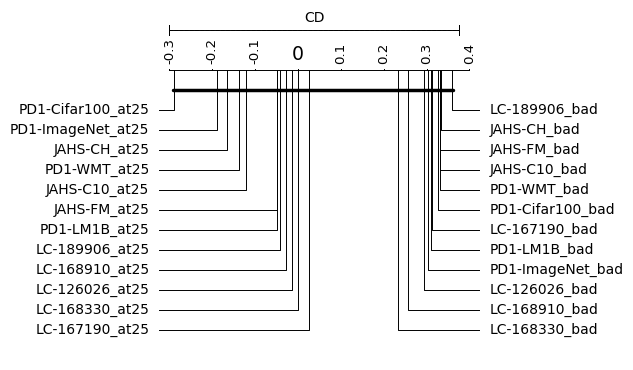

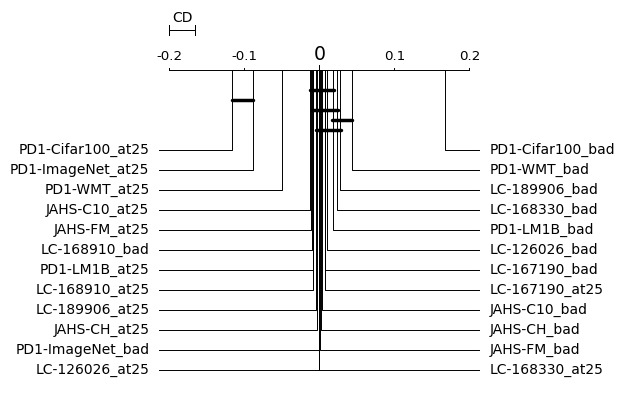

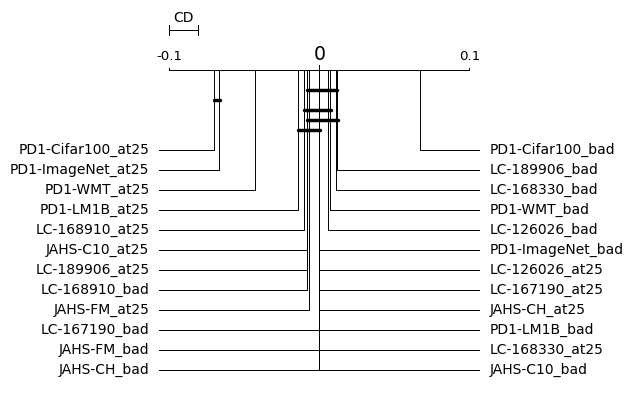

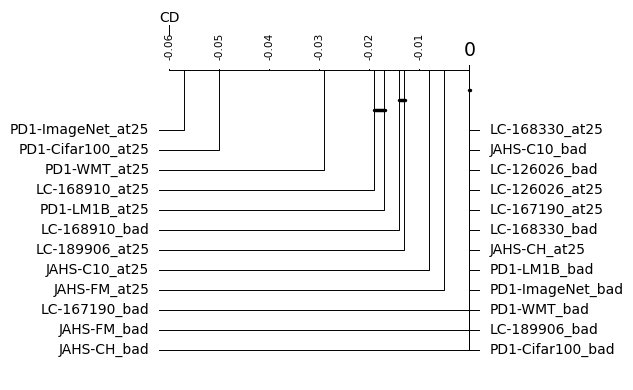

In [5]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)


# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))
for zone in wins_bench["zone"].unique():
    # print(post_1.loc[post_1[benchmark]==zone[0]])
    # print(post_2.loc[post_2[benchmark]==zone[0]])
    # print(wins_bench.loc[wins_bench["zone"]==zone])
    wins_model=model(f"scores~{benchmark}",wins_bench.loc[wins_bench["zone"]==zone],benchmark)
    cd_diagram(wins_model.post_hoc(benchmark),False,5,system_id=benchmark)


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\autorank\_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\autorank\_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


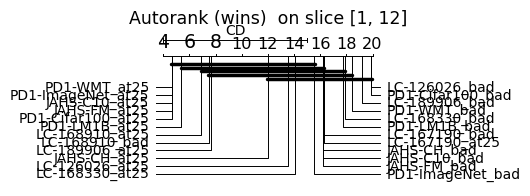

In [6]:
wins_bench["wins"]=wins_bench["wins"].astype(float)
wins_bench["zone"]=wins_bench["zone"].astype(str)
wins_bench[benchmark]=wins_bench[benchmark].astype(str)

# wins_model=model(f"scores~{benchmark}+fidelity+zone",wins_bench,benchmark,factor="zone")
# print(wins_model.summary())
# print(wins_model.post_hoc(benchmark,grouping_vars=["zone"]))

# post_1,post_2=wins_model.post_hoc(benchmark,grouping_vars=["zone"])
# for zone in wins_bench["zone"].unique():
    # print(post_1.loc[post_1[benchmark]==zone[0]])
    # print(post_2.loc[post_2[benchmark]==zone[0]])
    # cd_diagram((post_1.loc[post_1["zone"]==zone],post_2.loc[post_2["zone"]==zone]),False,5,system_id=benchmark)

plot_x=bt_plot([[1,12]],1,wins_bench,benchmark,"fidelity")
plot_x.change_row(0,None,loss="wins")#f"scores~{benchmark}",globality=False,loss="wins")
plot_x.show()